In [1]:
using DrWatson
@quickactivate "BNP2"
using Turing, BSON, Revise, BNP2

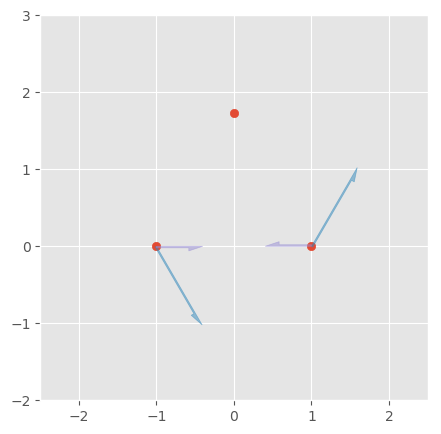

In [40]:
TBP = (
    m = 5e10,
    qs = [
        [-1,  0],
        [ 1,  0], 
        [ 0, √3], 
    ],
    ps = [
        [cos(π/3), -sin(π/3)],
        [cos(π/3),  sin(π/3)],
        [cos(π/1),  sin(π/1)],
    ],
    xlim = [-2.5, 2.5], 
    ylim = [-2.0, 3.0],
    do_addnoise = true,
    noise_level = 0.2,
)

let prob = TBP
    o1, o2, o3 = Particle.(prob.m, prob.qs, prob.ps)
    f1 = forceof(o1, o2)
    f2 = forceof(o2, o1)
    
    ###
    
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(prob.xlim)
    ax.set_ylim(prob.ylim)
    
    plot!(ax, o1; do_plotvelocity=true)
    plot_force!(ax, o1, f1)
    plot!(ax, o2; do_plotvelocity=true)
    plot_force!(ax, o2, f2)
    plot!(ax, o3)
    
    fig |> display
end

;

In [49]:
traj = 
let prob = TBP, n_steps = 50
    space = Space(Particle.(prob.m, prob.qs, prob.ps))
    sim = DiffEqSimulator(1e-1)
    
    HTML(
        animof(
            space, sim, 2 * n_steps; 
            xlim=prob.xlim, ylim=prob.ylim
        ).to_html5_video()
    ) |> display
    
    @info "" positionof(space) velocityof(space) stateof(space) accelerationof(space)
    
    traj = simulate(space, sim, n_steps)
    
    prob.do_addnoise ? 
        traj[1:n_steps] .+ prob.noise_level * randn.(size.(traj[1:n_steps])) : 
        traj
end

;

HTML{String}("<video width=\"500\" height=\"500\" controls autoplay loop>\n  <source type=\"video/mp4\" src=\"data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAGJxW1kYXQAAAKhBgX//53cRem9\n5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENv\ncHlsZWZ0IDIwMDMtMjAxNyAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9w\ndGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1o\nZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2\nIGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0\nX3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE2IGxvb2thaGVhZF90aHJlYWRz\nPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9j\nb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0\nPTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWlu\ndD0yNTAga2V5aW50X21pbj0yMCBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2Fo\nZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9\nNjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAAC+1liIQAN//+9vD+BTY7mNCX\nEc3onTMfvxW4ujQ3vc4AAAMAAAMADuPlocG+vHIc0AAAWwAGhwHgdr8wTD+3aYkOY+t2GtfTX0EL\nWvXuyPgFCc5A6MJnRBnagMpRcclrp6FJLA8/gDzrhSB3BPITWC6mJvn+yyJK7Ql5YU4bJHyELuZG\n/+O1phS1JVD+YpVnvMZMqzWf3ByZ2q6BCRC7ELIIK8CJNMAGaeAH0koOMF+rBOwzkF9PYRveOS6k\nBeAdmQxMoIZpiIXdhjPafLxt73wW/oMhkKji5R2Aq64XxPeqMouON51W8uwZOdKfR+10K36hC0Le\nw8RXCMq+8XcHIkHRjitNBMDUYI+zAMdMNeBcn+EAUvCmZQg5r4Fb/DZREmYZo0HgaSAAnfZWZfuQ\nAOcwGsDagZpXJ5a8Kk/QFD3vRyUuH+2cgHBd6bZhyt9EqF7DPM88N3EaNFLJYHouGlL1ZMQr9huR\nW1RJDrL/4c1snWZFjYUagjbJeumCEXZtlSw/v557cJFMdiFC5OhqhReVVft8y0OTR2birm62tz2J\nS4uPDvifz1q0JNNTaOugLoB4SORz5G0cAUYiLoUQ4qD8rfrgyYqN0fYbgEW0C4XloSzoN91ppBab\nNC9OikPtTPBPiHLnn7gp+6hqfp1gRZ98q+ARZFiKTBMxNzaPsA9QgL7nQFqj4xQ3SA16mlMkt2fu\n/rT9FjSZbliDi02Os9XuYA5ch+Zi96Q99q6DA16AIf5odAbjbbgM2Zrt5vEEleXUBqWIJaHXimbM\n1B6yfLG9LkqqmIiV9RGBnSEJCFsjauLCb/st/W9YVYbSzdDA06HuAVrrfL/i9DkAAUJYTUUyKUvT\nwHmXFt/g/nqFQpjlf9jWlghIw1VcXdKj4lQarPqgm3r3NAAD00Jtigh2B90xxyCFA99MgPM9SwR6\nc1BfC3I5OhdBTnnbEMPawRQHJEA9AXrlGE/ZAZtu8bhnmsF2xlptBwd3RZmM8YLsPk0qny4a980H\nDSLjhFEbLeYsRGqSV/Iazejr991QumcmH5/xuJok4ZChPOlgS8FMIMtSlEvyh7xYmbV1qB7YuL3a\npL/HdiZa9M7ByIQ5xnwUG3AEPiUXYnmOqbSAEI0T+UALbtYECgN/C0JB+9CMP3udeINGZ7+/Jyz8\nxqPZ+agYHzP+2ghrHlGRLJmU8uGBIgXcM3f8VRmAJWEbnlgjTGw21kbBgLv3SNd8g3SZgXITyNSt\nKxsM4yF/agMisgrL0OWAc5NsOdMkkb3OoJvdDkGX7KHvbUVW5IEY8eJgONR6S3DDIaXfLG3eMs5D\nHy4hDLpaiFx0T//5kCo9ENofzEAWmz7bqiDV0Kj1ItTrvy+iUZW7tcrXXs5WUQe8CwgDPLsGmwFY\ne7xKZM4pr43ZBpT6PNjXKBbkXzv0Wo0ASfduPNYfFEtKBIuHWalCC/SL4ht8OehCtMMzWU3CcXwC\nHX3BfQC9/RJN4DrVr041HovgiSK0ydB10hVNUWZnbYsiOwSxs6qo/lsPdP3Ol7ZMEgAAVnXLzEdw\nEaYrYQ/nGqqBTJf5tmyl9M0HuKXoOZ3QPo/kEatWbVq3leVHtZ4nTW2ehcCmkFZOMHwR4M9JXiZf\nThk77DEsjTwF3/V9cjTmZwsmoWZN0OhrcGyWsF7KPgfaWNC1bj+1v3rr49Agriw72toLx0ZoBj3z\nSK/uezJFF7bTE9970nYndXH+7KK8CZtDdxLMP7mb6WgGiGhIk+6fh5+05gfQJeQViSA/ps7+KU3e\nFL2loPTatBb7UxdLyG7nN3grSl3xqaUYQcFJ33xo9Ufqd2LRSYRLjF7gGX5d74oM/0Y2Zt7flQP7\no4wZMTgsLSr5FjFooiWkP7YcTzz5o6r7esHXHXxzhCv8OWfIh+pSoxQqNQgU8Wl+vYc5juOA8DW3\n18uxEMNBeTfGE8UdvZfhWCDSI4KHeuwFsEonEF0jXjzZVlAurgFeR4W0ZwSpkeNVOVgQfbKeQNsE\nv1DUtSbtCnozIntJ6tzDKZxHUF2DLpMskYRdvdIxYGwpBFvycPUw2Ekhn6awdcdgAiAti1bdBfPZ\nI++0XbgulEkQYWIoOnTbkB0jPqQd4SuwWMY1Dc4T81IMVKNGVlTtQId1AIbkAONTHDkYbj64AnED\nVxrdqci3VEkbdDn2C21FVql6+j0eheADjx/XqaJ9F7pZrLIa8wxn/KcqkoicK/SF8TwkeUvSTlVo\niN/JCRSd+YdFL8OLjbejn6cQbDLXFbBOcaWge/iF5FbIjvOWiIRV6pqvV7IkErVwLBUcb2C5+VD5\nw8A9qz3Ro/QxecZtRNumed+XeDkvxHBz8BkBoF66IENQ26YStnGnegJjOfnfmCYFHQ7UEK6dclHK\nbNUDMcazNdkxSw/6VctkniYWJTbaULNBGdVim6rdGPDd/z4cVvDjMxh9kD4AYlu/yjMWseBwADb7\nLXkpqPqVkZmYmKlTPTrgOeBe82+Nw2ieGGlx8jytNvCaq2lGCYipZNFZ7hhJ1dIZ5z3uC5Xgz78m\nb6DIagecPXLKAlwD6Y2uVAAAAwLIlZQ1lJehHyKBQZQTiEPXJQfYmWCIqOhxNct5omC2En/yl2kW\nLlTitdP/KbRMH1DNdnAFwp7XvK4xYr2Hs1hmAinTMy8kLH7uJfGHeZEqzPe+HWGdVeVDvikmqTjy\nPV9PG6JzcLWpvZ2ye6SkrR95sAMIEXCfHoJJQyqNMicZH5p0w/FaPtQhs8XpJPTUZS7n7OmdJIRj\nO1hXdgqKUn1E0e7KV8CScTJxeC9znPNMAwQq5ce4kMViVg

┌ Info: 
│   positionof(space) = [-1.0, 0.0, 1.0, 0.0, 0.0, 1.7320508075688772]
│   velocityof(space) = [0.5000000000000001, -0.8660254037844386, 0.5000000000000001, 0.8660254037844386, -1.0, 1.2246467991473532e-16]
│   stateof(space) = 12-element LabelledArrays.LArray{Float64,1,Array{Float64,1},(q = 1:6, p = 7:12)}:
 :q => -1.0                  
 :q => 0.0                   
 :q => 1.0                   
 :q => 0.0                   
 :q => 0.0                   
 :q => 1.7320508075688772    
 :p => 0.5000000000000001    
 :p => -0.8660254037844386   
 :p => 0.5000000000000001    
 :p => 0.8660254037844386    
 :p => -1.0                  
 :p => 1.2246467991473532e-16
│   accelerationof(space) = [1.2514312500000002, 0.72251416905981, -1.2514312500000002, 0.72251416905981, 0.0, -1.44502833811962]
└ @ Main In[49]:13


MethodError: MethodError: no method matching size(::Space{Tuple{Particle{2,Float64,Array{Float64,1},Array{Float64,1}},Particle{2,Float64,Array{Float64,1},Array{Float64,1}},Particle{2,Float64,Array{Float64,1},Array{Float64,1}}},Array{Float64,1}})
Closest candidates are:
  size(!Matched::BitArray{1}) at bitarray.jl:77
  size(!Matched::BitArray{1}, !Matched::Integer) at bitarray.jl:81
  size(!Matched::Core.Compiler.StmtRange) at show.jl:1598
  ...

In [4]:
using BNP2: pqof, vec2list

@model three_body(traj) = begin
    m = 5e10
    u ~ MvNormal(zeros(12), 5)
    q, p = pqof(u)
    space = Space(Particle.(m, vec2list(q), vec2list(p)))
    for i in 1:length(traj)
        space′ = transition(space, 1e-1)
        traj[i] ~ MvNormal(stateof(space′), 5e-1)
        space = space′
    end
end

mf = three_body(traj[2:21])

@time chn = sample(mf, NUTS(10, 0.65), 20)

chn |> display

# let prob = TBP
#     bson("three_body-noise=$(prob.do_addnoise).bson", chn = chn)
# end

;

┌ Info: Found initial step size
│   ϵ = 0.2
└ @ Turing.Inference /Users/kai/.julia/packages/Turing/MoqTc/src/inference/hmc.jl:553


Object of type Chains, with data of type 10×24×1 Array{Real,3}

Iterations        = 1:10
Thinning interval = 1
Chains            = 1
Samples per chain = 10
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, max_hamiltonian_energy_error, n_steps, nom_step_size, numerical_error, step_size, tree_depth
parameters        = u[1], u[2], u[3], u[4], u[5], u[6], u[7], u[8], u[9], u[10], u[11], u[12]

2-element Array{ChainDataFrame,1}

Summary Statistics
  parameters     mean     std  naive_se     mcse     ess   r_hat
  ──────────  ───────  ──────  ────────  ───────  ──────  ──────
        u[1]   0.9833  0.0053    0.0017  missing  4.8000  1.0000
        u[2]   2.9831  0.0225    0.0071  missing  4.8000  1.0000
        u[3]  -5.8070  0.0338    0.0107  missing  4.8000  1.0000
        u[4]  -2.1774  0.0144    0.0045  missing  4.8000  1.0000
        u[5]  -1.4444  0.0110    0.0035  missing  4.8000  1.0000
        u[6]   2.0346  0.0011    0.0

 28.764916 seconds (47.44 M allocations: 2.691 GiB, 3.18% gc time)


In [5]:
q̄s = 
let U = hcat(get(chn, [:u]).u...)', n_steps = 50, do_map = true
    m = 5e10
    do_map && (U = mean(U; dims=2))
    q̄s = zeros(6, n_steps)
    for i in 1:size(U, 2)
        u = U[:,i]
        q, p = Vector{Float64}.(pqof(u))
        space = Space(Particle.(m, vec2list(q), vec2list(p)))
        traj = simulate(space, 1e-1, n_steps)
        q̄s = q̄s + hcat(positionof.(traj)...)
    end
    q̄s / size(U, 2)
end

;

In [6]:
using BNP2: TwoDimPath, animation

let prob = TBP, q̄s = q̄s
    xlim = prob.xlim
    ylim = prob.ylim
    
    fig, ax = plt.subplots(figsize=(5, 5))
    
    function reset!(ax)
        ax.clear()
        !isnothing(xlim) && ax.set_xlim(xlim)
        !isnothing(ylim) && ax.set_ylim(ylim)
    end
    
    init!() = reset!(ax)
    
    function draw!(t)
        reset!(ax)
        plot!.(Ref(ax), Particle.(nothing, vec2list(q̄s[:,1])))
        plot!(ax, TwoDimPath(q̄s[1,1:t], q̄s[2,1:t]), "--", alpha=0.5)
        plot!(ax, TwoDimPath(q̄s[3,1:t], q̄s[4,1:t]), "--", alpha=0.5)
        plot!(ax, TwoDimPath(q̄s[5,1:t], q̄s[6,1:t]), "--", alpha=0.5)
        plot!.(Ref(ax), Particle.(nothing, vec2list(q̄s[:,t])))
    end
    
    anim = animation.FuncAnimation(fig, draw!; init_func=init!, frames=1:size(q̄s, 2), interval=50, blit=false)
    HTML(anim.to_html5_video()) |> display
end

;

HTML{String}("<video width=\"500\" height=\"500\" controls autoplay loop>\n  <source type=\"video/mp4\" src=\"data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAA+R21kYXQAAAKhBgX//53cRem9\n5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENv\ncHlsZWZ0IDIwMDMtMjAxNyAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9w\ndGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1o\nZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2\nIGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0\nX3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE2IGxvb2thaGVhZF90aHJlYWRz\nPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9j\nb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0\nPTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWlu\ndD0yNTAga2V5aW50X21pbj0yMCBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2Fo\nZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9\nNjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAACJ9liIQAP//+92ifAptaQ3qA\n5JXFJdtPgf+rZ3B8j+kDAAADAAADACQC/Me/oQdDNCAAAE9ABHwE/BZq4gOj/Ox6R6oK5oK2TZeT\naLDoA8CeVb5RFrCfjW8CVRlHwDdBLf0FOWVgoXY1hju4FcLMiNTNywmv2YOk2lvcLzRpw2SPkIXc\n11fZsIaKuqU5xR7WcdsMwbfP67IntDmkRsvyS8ELIJhUXi1+wS+Z89+2w9AV+qfcn2RARR5BkkrV\nrlxhgdmSGN0etwyWJ8mKnlXhTY8LcjFm6Ufj9rgu+//4r36BzfRz9hCF9oqdgH4scLdTpxLQsIWh\nb2mbLYkRGfF3ByJB0Y4rTbr2p7xBcA9Id46qhWdr1K/FvfblD89tbLEtItIWlXJgIoYxQM+17aka\nuf49iXbChovIJBimBNcqbngOapL60IfTrLA2uOt+gfxYSZaa+5tXeY/MYXG7t4qG2Uyzs210WNlp\n8yHSAEaPWvf0djtYoQc338kwH0olTIROBT2ltrRt7KpcDNCdFpkUgD8lQCz5uX9V1Ho4y0lb22ia\neiAABbl33kgGngAV4D8786dz+m6ggWyR1GJuaIk3IgA7T9dFm+93x3/pxmLqCEHuKbJfI6quIrBT\n5i5sXzoRHxA5jQjUGf8FYYkvsYXrPvpPM3cqdlZ3Yc5U7HrUJuvMdTQ7r6u5kSEZ105mDLKlX7fM\ntDk0az6Mfp7/BZUmsnYki+XPmGq747VkM8GEDELfK3YyucA6FrwVX1JLPmplq0O+yEHM35XZUP4L\nKplZR3JfOfsrsEkqxw9JJshbnesSYCMf46H0jgv3qNo/QlDs1pBVhNiJPVg/khR7kw4vNNNT5oyf\nB10gpR5kqh0lPFKx5C/1oE2MrqOCj3hwwBHm74b1w3Vtn2GHnY9uraGQyAjb3gUv0dsam4NLcxNg\nIvXbvhTRF0Ik1wF30axJR9X7stnS0uoCTQdhfbb3jLLXzfK6N6CwbVIzix1MUf+O9mil/D8ZfVLt\npf1gaS2A0g8hB3MdXPQkAAUvMBF7a73fuS+D0ZKgbzIkCdiEj0HHQIRMZQGQjlBmmBUhj0kNkwT0\nNuaPIOMxFaBWezH+tw7PVbov/An8LgSS4byxbFiZiypPbuJj6ALfYPWEcGP6GHuKn3nMSf5uNvXT\n2mtV08rYdr/87WdNM/Ynx/JC18GN2pnwDvf3bWxS+Y4rZ07KryqGuVtBfc/W1srZl090hPXwk00s\nAJVTzZbtxc47bxhE3SgX5SQu5viWBx364IjR91L6Ck8JqjRB44au5rlUZADHIxYuDtKcEYAAAMWG\nowOJLDkIBINUsT31w326AtJyeTVJnYu/3hkL9nOBuSIoCjFRIw90U/BNq0FwCpI8auW2MElEdkvW\n15MwH8+l+gIb9Idt1Ojr/vJsfxbVYzwNKPhI57pDNmJBc6oiQ9qlJjRPXSPPgK2t3ZWtqMm0G8MZ\n7GG/TqH1lxlFCRsWDGlgLqIPM7W9w9YMlO4rY+kqO6XSTwjouLAEPpD9u+q5gnNpIEILV5lA+CH9\nuk0mDMoUcLb39tVJNBYBn+q+nfFQCO7w3R0f4UFfqo3c8CwQ4/H7bwNOZrr+et/MVlgWUfCk0OcU\n5vSaqlb0gIkSyrPcG+HFeEaXv70BHND56mBl3m0CFMLgAAEh7vLNvGl9U0t+aAJMOuIoAAADAADe\nwKUTyqsx28hfgRbc0M3HFaQNvy7yzJuc1UBJeBy0/yom81wK8OuoZH9vW0UyEnEliYEffUaf9CG2\ngh7IlYvu8c1ngir29GSNCSSouWPixyTG/gfwV5cfTbh/PK6ziP9aB2LbWNDxJFD1JaL6b0T5poLf\nxwqUDStKuD0LcQo1k2AS/K7Dv1KJhmvB2+HzstueuPojCv1SBP3l3lJ7tEvu+RxBswfyGY4PVjfb\nJQy/E41hti1Ikv8C3380CD3fHpk/v08ojjSVIAABKYRegEYXWV1gqvgAAAMAAFLKowCKXPSe8j28\nrR6R63hdCDxEuUYNuDs2iRgohLRzTm96ceoXSTGajPkj7KfI5j6UKWoojefSF1rhBL1GwdXkV0NT\nHGSLuRDfYbMm2+fFPkEVlAl4L3Tqx1HrW9f2iXMfaBur4ToBfJZKGvmBWtV6dXrmmrGtU8M6eFse\nH4pFbxOu16ntJD5SB1zdkMwrJPHbX1m3vhiDNrBp/5xBVGW37/wNT2QB2CqQpHJdG/n9RGGYgmI5\nsj/ZYBJbDJygyUGFv2Gh5MMd8Pi+tYdbMPV55FbDDzFJEwNl5R3dW5+iqpz8MfKKMW4q8N3eg5Pu\n2Tjsk0fjKqjpCtlNNpLRwcmGU9uY6DJXLqnE4dddsuIJtu0s5PN7mrSbDXpv8I8N4SHlcG97J4DN\nmOllsbQN9YtHBe3NqE+iZI1m7p+gR3eE5e4W4hB2xu4OfcYp/isEPxSg8prL3/cJhAwq6Qd/hkN4\nkXncBJZw4znPH8RzSlf5RUvYZr2Abh6PLgBseWgPQhhnEoQShTS6fpNF9wxVh4wWenoK+N+mUyK5\n/y6ahxJgoI3U/mNfLhplyOcfM7q7k6kt53OyRxDyUuUjg6OuCuhJ1/qSiK8cdJLusgcuHvbC69MA\nxUotTbRiwdrrRumUw92P4M0vzx3wXXuf2H6YEv08+VHfWyouLrQkWoCfg6XtdHQ+lsnw8UDSJizw\nxjbZYr975pwwUy4BeFrBcvc7pxGFjhy5nZYU8e6n46D2CnP+0At2P0RZwvcdhnRrmpoqX7MF4/q6\nyG3y6yUKz43wymCk/bYZF/470ff7peg0UK4OCwKdxz6FzN